In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Advertising.csv")

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [53]:
x = df.drop('sales',axis=1)

In [6]:
y = df['sales']

In [7]:
from sklearn.preprocessing import PolynomialFeatures

In [8]:
polynominal_converter = PolynomialFeatures(degree=2,include_bias=False)

In [9]:
poly_feature = polynominal_converter.fit_transform(x)

In [55]:
poly_feature.shape

(200, 9)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(poly_feature, y, test_size=0.33, random_state=101)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
model = LinearRegression()

In [15]:
model.fit(X_train,y_train)

LinearRegression()

In [16]:
test_predictions = model.predict(X_test)

In [17]:
model.coef_

array([ 5.25319441e-02,  1.42773271e-02,  1.47528851e-02, -1.12739168e-04,
        1.13231490e-03, -5.42180033e-05,  6.26813126e-05,  8.93347558e-05,
       -3.52004070e-05])

In [18]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [19]:
MAE = mean_absolute_error(y_test,test_predictions)

In [20]:
MSE = mean_squared_error(y_test, test_predictions)

In [21]:
RMSE = np.sqrt(MSE)

#### create different order poly - split ppoly feat train/test - fit on train - store the rmse for both the train and test - plot the results

In [24]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1,10):
    
    poly_converter = PolynomialFeatures(degree=d, include_bias=False)
    poly_features = poly_converter.fit_transform(x)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.33, random_state=101)
    
    model = LinearRegression()
    model.fit(X_train,y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train,train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test,test_pred))
    
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)

In [25]:
train_rmse_errors

[1.7376515982447711,
 0.5947926597019146,
 0.44059734232363656,
 0.3532913282038107,
 0.2484537229931113,
 0.18836238716589793,
 4.722022747237672,
 0.15323286253971005,
 0.15071540715907641]

In [26]:
 test_rmse_errors

[1.5324409426512413,
 0.6482912032533653,
 0.5577254823362756,
 0.5064297278973824,
 2.357357683782791,
 11.217715741560507,
 1194.368961973932,
 3468.994416342332,
 166098.4151370038]

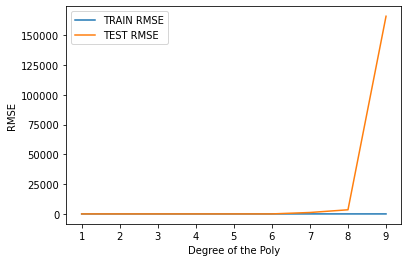

In [30]:
plt.plot(range(1,10),train_rmse_errors,label='TRAIN RMSE')
plt.plot(range(1,10),test_rmse_errors,label='TEST RMSE')

plt.xlabel('Degree of the Poly')
plt.ylabel('RMSE')
plt.legend()

In [31]:
final_poly_converter = PolynomialFeatures(degree=3, include_bias=False)

In [32]:
final_model=LinearRegression()

In [33]:
full_converted_x = final_poly_converter.fit_transform(x)
final_model.fit(full_converted_x,y)

LinearRegression()

In [34]:
from joblib import dump, load

In [36]:
dump(final_model,'final_poly_model.joblib')

['final_poly_model.joblib']

In [37]:
dump(final_poly_converter,'final_converter.joblib')

['final_converter.joblib']

In [38]:
loaded_converter= load('final_converter.joblib')

In [39]:
loadded_model = load('final_poly_model.joblib')

In [43]:
campaign=[[149,22,12]]

In [45]:
transformed_data = loaded_converter.fit_transform(campaign)

In [47]:
loadded_model.predict(transformed_data)

array([14.64501014])